<a href="https://colab.research.google.com/github/xzdil/googlecollabprojects/blob/main/Capstone_project_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adil Rakhimzhanov 

## Emotion classification in text

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


### Import dataset from kaggle

In [ ]:
import json

# Замените <PASTE API KEY HERE> на скопированный текст из файла kaggle.json
api_key = {"username":"adilrakhimzhanov","key":"3bf1059dcce07a79705c19b85f3bbfb8"}

# Сохраните API-ключ в файл
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(
      api_key, f)

### Next steps

In [ ]:
!kaggle datasets download -d parulpandey/emotion-dataset

100% 715k/715k [00:00<00:00, 871kB/s]
100% 715k/715k [00:00<00:00, 871kB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("emotion-dataset.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [ ]:
train_df = pd.read_csv("training.csv")
test_df  = pd.read_csv("test.csv")
valid_df = pd.read_csv("validation.csv")

In [ ]:
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
train_df.label.unique()

array([0, 3, 2, 5, 4, 1])

In [ ]:
tags = ["sadness", "joy", "love", "anger", "fear","surprise"]

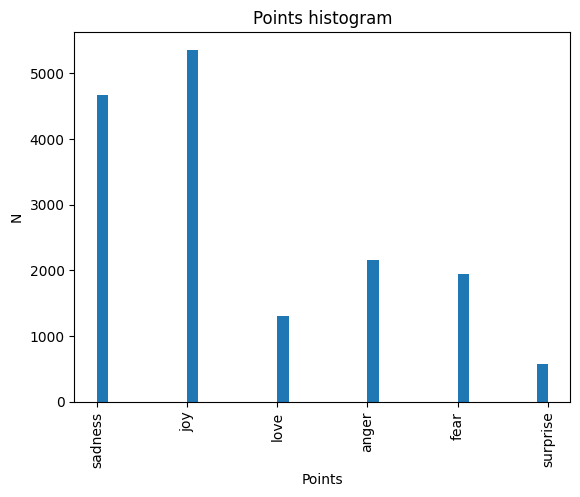

In [ ]:
plt.hist(train_df.label, bins=40)
plt.title("Points histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.xticks([0, 1, 2, 3, 4,5], tags)
plt.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
X_train = train_df['text']
y_train = train_df['label']

X_test = test_df['text']
y_test = test_df['label']

X_val = valid_df['text']
y_val = valid_df['label']

In [ ]:
# Создание экземпляра слоя TextVectorization
vectorizer = tf.keras.layers.TextVectorization(max_tokens=15000, output_mode='int',output_sequence_length=33)

# Преобразование данных в одномерный тензор
x_train_flat = tf.reshape(X_train, [-1])
x_val_flat = tf.reshape(X_val, [-1])

In [ ]:
# Применение слоя TextVectorization к тренировочным данным и получение словаря
vectorizer.adapt(x_train_flat)
vocab = vectorizer.get_vocabulary()


# Преобразование тренировочных и тестовых данных в трехмерный формат
x_train = vectorizer(tf.reshape(x_train_flat, [-1, 1]))
x_val = vectorizer(tf.reshape(x_val_flat, [-1, 1]))

In [ ]:
import json

# Сохраните словарь в файл, используя json
with open('vocab.json', 'w') as f:
    json.dump(vocab, f)


In [ ]:
tf.keras.utils.to_categorical(y_train, num_classes=len(tags))

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# from tensorflow.keras.layers import LayerNormalization
# normalization_layer = LayerNormalization(epsilon=0.1, center=True, scale=True,)
# x_train = normalization_layer(x_train)
# x_val = normalization_layer(x_val)

In [ ]:
len(vocab)

15000

In [ ]:
# Определение модели
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(vocab), output_dim=32, input_length=33),
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(tags), activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 33, 32)            480000    
                                                                 
 lstm_3 (LSTM)               (None, 64)                24832     
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 6)                 774       
                                                                 
Total params: 530,438
Trainable params: 530,438
Non-tr

In [ ]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Обучение модели
history = model.fit(x_train,
          tf.keras.utils.to_categorical(y_train, num_classes=len(tags)),
          epochs=45,
          steps_per_epoch=50,
          batch_size=32,
          validation_data=(x_val, tf.keras.utils.to_categorical(y_val, num_classes=len(tags))))


Epoch 1/45
50/50 [==============================] - 11s 165ms/step - loss: 1.6239 - accuracy: 0.3450 - val_loss: 1.5932 - val_accuracy: 0.3520
Epoch 2/45
50/50 [==============================] - 3s 67ms/step - loss: 1.5719 - accuracy: 0.3181 - val_loss: 1.5879 - val_accuracy: 0.3520
Epoch 3/45
50/50 [==============================] - 2s 42ms/step - loss: 1.5834 - accuracy: 0.3269 - val_loss: 1.5797 - val_accuracy: 0.3520
Epoch 4/45
50/50 [==============================] - 2s 37ms/step - loss: 1.5786 - accuracy: 0.3306 - val_loss: 1.5875 - val_accuracy: 0.2725
Epoch 5/45
50/50 [==============================] - 1s 29ms/step - loss: 1.5773 - accuracy: 0.3350 - val_loss: 1.5643 - val_accuracy: 0.3520
Epoch 6/45
50/50 [==============================] - 2s 31ms/step - loss: 1.4176 - accuracy: 0.3638 - val_loss: 1.5000 - val_accuracy: 0.3175
Epoch 7/45
50/50 [==============================] - 1s 29ms/step - loss: 1.3339 - accuracy: 0.3800 - val_loss: 1.3531 - val_accuracy: 0.4250
Epoch 8/45


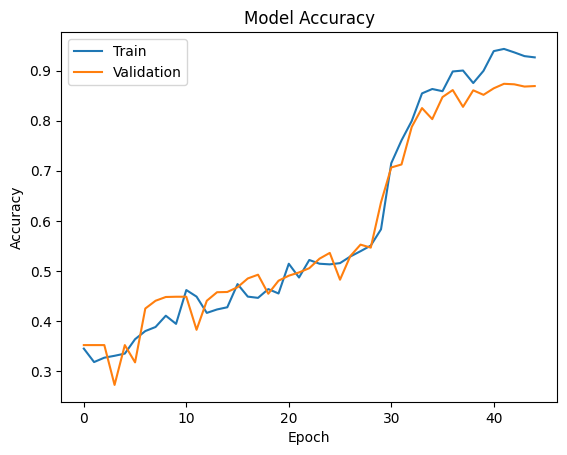

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

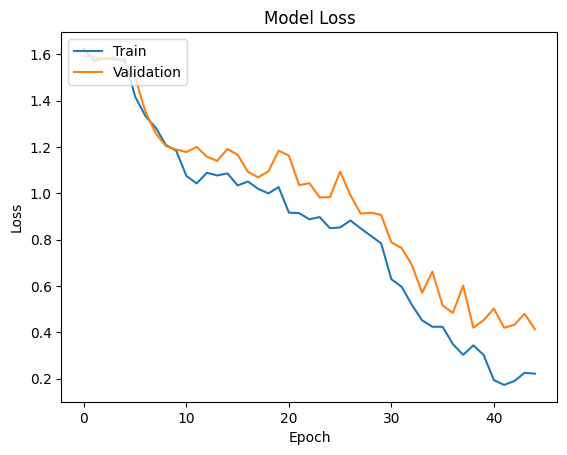

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
vocab[915]

'fucking'

In [ ]:
sent = "I was extremely upset by the weather today and all this fucking dirt"
sent_flat = tf.reshape(sent, [-1])
vect = vectorizer(tf.reshape(sent, [-1, 1]))
print(vect)
print()
print(np.round(model.predict(vect),2))
print()
print(tags[np.argmax(model.predict(vect))])

tf.Tensor(
[[   2   20  377  656   45    6  962  122    4   36   23  915 6888    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]], shape=(1, 33), dtype=int64)

1/1 [==============================] - 0s 68ms/step
[[0.79 0.18 0.01 0.01 0.   0.  ]]

1/1 [==============================] - 0s 68ms/step
sadness


In [ ]:
model.save("/content/my_modelV2.h5")

28